In [1]:
import numpy as np
C_0, meta, i = 10000, 11000, 0.008
k = np.ceil((meta/C_0 - 1)/i)
k = k.astype(int)               # Conversión a entero (para visualización)
C_k = C_0*(1+k*i)               # Cálculo del capital al final del periodo k
C_k = round(C_k, 2)             # Redondeo con dos cifras decimales

# Imprimimos respuesta en pantalla
print("El número de periodos que se debe dejar invertido el dinero es ", k,". Al final del periodo ", k,
      ", el capital es ", C_k, ".", sep="")

El número de periodos que se debe dejar invertido el dinero es 13. Al final del periodo 13, el capital es 11040.0.


In [2]:
# Librerías para gráficos
import matplotlib.pyplot as plt
# Para que se muestren las gráficas en la misma ventana
%matplotlib inline
# Librería para widgets de jupyter
from ipywidgets import *

def interes_simple(C_0, meta, i):
    # Despejamos k
    k = np.ceil((meta/C_0 - 1)/i)           # Notar el uso de la función ceil
    k = k.astype(int)                       # Conversión a entero
    C_k = C_0*(1+k*i)                       # Cálculo del capital al final del periodo k
    C_k = round(C_k, 2)                     # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0,k,k+1)               
    # Vector de capitales por periodo
    CC = C_0*(1+kk*i)
    # Gráfico
    plt.figure(num=1); plt.clf()            # Figura 1, borrar lo que contenga
    plt.plot(kk, CC,'*',linewidth=3.0)      # Se grafica la evolución de los capitales
    plt.plot(kk,meta*np.ones(k+1),'--k')    # Se grafica la meta
    plt.xlabel('k')                         # Etiqueta eje x
    plt.ylabel('C_k')                       # Etiqueta eje y
    plt.grid(True)                          # Malla en la gráfica
    plt.show()                              # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")
    
interact_manual(interes_simple, C_0=fixed(10000), meta=(10000,12000,100), i=fixed(0.008));

In [3]:
def interes_compuesto(C_0, meta, i):
    # Despejamos k
    k = np.ceil(np.log(meta/C_0)/np.log(1+i))
    k = k.astype(int)
    C_k = C_0*(1+i)**k                      # Cálculo del capital al final del periodo k
    C_k = round(C_k,2)                      # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0,k,k+1)
    # Vector de capitales por periodo
    CC = C_0*(1+i)**kk
    # Gráfico
    plt.figure(num=1); plt.clf()            # Figura 1, borrar lo que contenga
    plt.plot(kk, CC,'*',linewidth=3.0)      # Se grafica la evolución de los capitales
    plt.plot(kk,meta*np.ones(k+1),'--k')    # Se grafica la meta
    plt.xlabel('k')                         # Etiqueta eje x
    plt.ylabel('C_k')                       # Etiqueta eje y
    plt.grid(True)                          # Malla en la gráfica
    plt.show()                              # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")
    
interact_manual(interes_compuesto, C_0=fixed(10000), meta=(10000,12000,100), i=fixed(0.008));

In [4]:
# Librería de cálculo simbólico
import sympy as sym

# Para imprimir en formato TeX
from sympy import init_printing; init_printing(use_latex='mathjax')
from IPython.display import display

# Símbolos t(para el tiempo) y r(para el interés instantáneo)
#t, r = sym.symbols('t r')
# Otra forma de hacer lo anterior
sym.var('t r')

C = sym.Function('C')

In [5]:
eqn = sym.Eq(sym.Derivative(C(t),t) - r*C(t), 0) # Ecuación diferencial
display(eqn) # Mostrar ecuación
sym.dsolve(eqn, C(t)) # Resolver

          d           
-r⋅C(t) + ──(C(t)) = 0
          dt          

           r⋅t
C(t) = C₁⋅ℯ   

In [6]:
# Librerías para integración numérica
from scipy.integrate import odeint

# Modelo de capitalización continua
def cap_continua(C, t, r):
    return r * C

In [7]:
def interes_continuo(C_0, meta, r):
    # Despejamos t
    t = np.log(meta/C_0)/r
    # Vector de periodos
    tt = np.linspace(0,t,100)
    # Vector de capitales por periodo
    CC = odeint(cap_continua, C_0, tt, args = (r,))
    # Gráfico
    plt.figure(num=1); plt.clf()                # Figura 1, borrar lo que contenga
    plt.plot(tt, CC,'-',linewidth=3.0)          # Se grafica la evolución de los capitales
    plt.plot(tt,meta*np.ones(len(tt)),'--k')    # Se grafica la meta
    plt.xlabel('t')                             # Etiqueta eje x
    plt.ylabel('C(t)')                          # Etiqueta eje y
    plt.grid(True)                              # Malla en la gráfica
    plt.show()                                  # Mostrar la figura
    
interact_manual(interes_continuo, C_0=fixed(10000), meta=(10000,20000,100), r=fixed(np.log(1+i)));

In [8]:
# Librería de análisis de datos
import pandas as pd
# Librería para manipulación de fechas
from datetime import date

# Datos para la cuenta de ahorro
Tasa_interes = 0.1
Anos = 2
Abonos_ano = 12
Inicial = 10000
Meta = 100000
fecha_inicio = (date(2018,1,31))

# Cálculo de abonos mensuales iguales para llegar a la meta de ahorro en el tiempo deseado
Abono = (Tasa_interes/Abonos_ano)*(Meta - Inicial*(1+Tasa_interes/Abonos_ano)**(Anos*Abonos_ano))/((1+Tasa_interes/Abonos_ano)**(Anos*Abonos_ano)-1)

# Rango de fechas en la tabla
rng = pd.date_range(fecha_inicio, periods=Anos*Abonos_ano, freq='MS')
rng.name = "Fecha del abono"

# Columnas de abonos y extracto de cuenta en las fechas respectivas
df = pd.DataFrame(index=rng,columns=['Abono', 'Balance'], dtype='float')
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Periodo"  # Columna correspondiente al periodo

# Los abonos son iguales
df["Abono"] = Abono

# Vector indizador de los periodos de los abonos
index_vector = np.arange(1,len(rng)+1)
# Extracto de la cuenta mes a mes
df["Balance"] = Inicial*(1+Tasa_interes/Abonos_ano)**index_vector+Abono*(((1+Tasa_interes/Abonos_ano)**index_vector-1)/(Tasa_interes/Abonos_ano))

# Redondear con dos cifras decimales
df = df.round(2)
df

# La siguiente solución es también válida. Sin embargo, evitar el uso de 'for'

#df.loc[1, "Balance"] = Inicial*(1+Tasa_interes/Abonos_ano)**1 + df.loc[1, "Abono"]

#for i in range(2, len(df)+1):
#    # Get the previous balance as well as current payments
#    prev_balance = df.loc[i-1, "Balance"]

#    df.loc[i, "Balance"] = prev_balance*(1+Tasa_interes/Abonos_ano)**1 + df.loc[i, "Abono"]

,Fecha del abono,Abono,Balance
Periodo,,,
1,2018-02-01,3319.71,13403.04
2,2018-03-01,3319.71,16834.45
3,2018-04-01,3319.71,20294.44
4,2018-05-01,3319.71,23783.27
5,2018-06-01,3319.71,27301.18
6,2018-07-01,3319.71,30848.40
7,2018-08-01,3319.71,34425.18
8,2018-09-01,3319.71,38031.76
9,2018-10-01,3319.71,41668.40


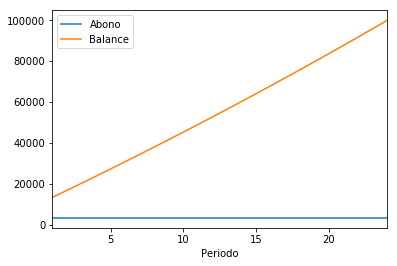

In [9]:

df.plot()

In [14]:
excel = pd.ExcelWriter("TablaAbonos.xlsx")
df.to_excel(excel,"Hoja 1")
excel.save()